In [91]:
# %pip install numpy
# %pip install pandas
# %pip install tensorflow
# %pip install matplotlib
# %pip install seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Air Quality and Pollution Assessment Classification Model

## Key features of the dataset
- Temperature (°C): Average temperature of the region.

- Humidity (%): Relative humidity recorded in the region.

- PM2.5 Concentration (µg/m³): Fine particulate matter levels.

- PM10 Concentration (µg/m³): Coarse particulate matter levels.

- NO2 Concentration (ppb): Nitrogen dioxide levels.

- SO2 Concentration (ppb): Sulfur dioxide levels.

- CO Concentration (ppm): Carbon monoxide levels.

- Proximity to Industrial Areas (km): Distance to the nearest industrial zone.

- Population Density (people/km²): Number of people per square kilometer in the region.

## Target Variable: Air Quality Levels
- Good: Clean air with low pollution levels.

- Moderate: Acceptable air quality but with some pollutants present.

- Poor: Noticeable pollution that may cause health issues for sensitive groups.

- Hazardous: Highly polluted air posing serious health risks to the population.

### Dataset
https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment


In [92]:
# Assuming the file you want to read is 'data.csv'
file_path = './data.csv'
# Load the data from the file
df = pd.read_csv(file_path)

### Explore the dataset

In [93]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [94]:
df.shape

(5000, 10)

In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,5000.0,30.029020,6.720661,13.40,25.10,29.00,34.000,58.60
Humidity,5000.0,70.056120,15.863577,36.00,58.30,69.80,80.300,128.10
PM2.5,5000.0,20.142140,24.554546,0.00,4.60,12.00,26.100,295.00
PM10,5000.0,30.218360,27.349199,-0.20,12.30,21.70,38.100,315.80
NO2,5000.0,26.412100,8.895356,7.40,20.10,25.30,31.900,64.90
SO2,5000.0,10.014820,6.750303,-6.20,5.10,8.00,13.725,44.90
CO,5000.0,1.500354,0.546027,0.65,1.03,1.41,1.840,3.72
Proximity_to_Industrial_Areas,5000.0,8.425400,3.610944,2.50,5.40,7.90,11.100,25.80
Population_Density,5000.0,497.423800,152.754084,188.00,381.00,494.00,600.000,957.00


In [96]:
df.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

<Axes: >

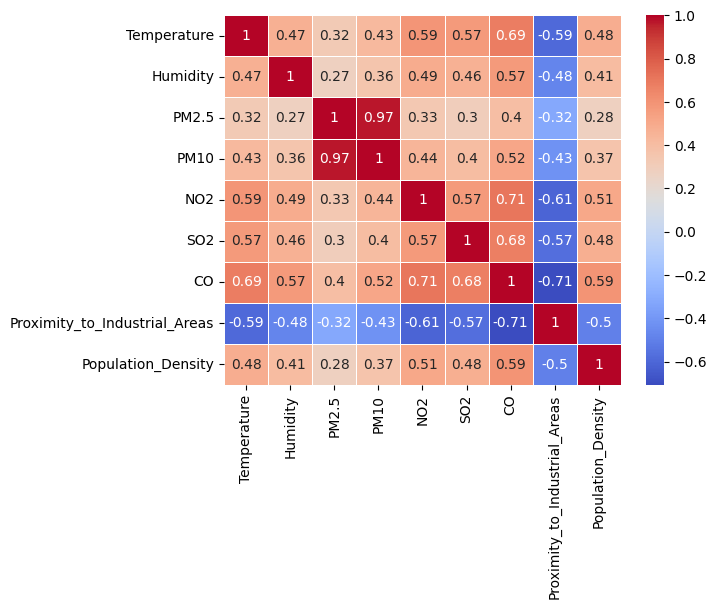

In [97]:

# Exclude the 'Air Quality' column from the correlation calculation
corr_matrix = df.drop(columns=['Air Quality']).corr()

plt.Figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)


# Create Classication Model

### data preprocessing 

In [98]:
label = 'Air Quality'

# unique_values = df[label].unique()
unique_labels = ['Good', 'Moderate', 'Poor', 'Hazardous']

#convert strings to numerical values
label_map = {
    unique_labels[0]: 0,
    unique_labels[1]: 1,
    unique_labels[2]: 2,
    unique_labels[3]: 3,
}

label_map

{'Good': 0, 'Moderate': 1, 'Poor': 2, 'Hazardous': 3}

In [99]:
training_data = df.iloc[:len(df)//4]

# all columns except label
training_features = training_data.drop(columns=[label])

# disgrad all columns except label
training_labels = training_data.filter([label])
training_labels = training_labels[label].map(label_map)
training_data

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
1245,23.2,69.7,5.8,14.1,24.6,3.5,0.97,12.3,579,Good
1246,34.9,63.0,59.7,69.2,29.5,8.2,1.07,5.2,568,Moderate
1247,44.8,97.8,35.2,58.0,38.3,29.6,2.80,6.3,816,Hazardous
1248,41.3,90.6,70.6,88.5,45.0,30.2,2.93,6.8,902,Hazardous


In [100]:
# set test data
test_data = df.iloc[len(df)//4:]
test_data[label] = test_data[label].map(label_map)

# all columns except label
test_features = test_data.drop(columns=[label])

# disgrad all columns except label
test_labels = test_data.filter([label])
test_labels

/tmp/ipykernel_96005/2197963150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[label] = test_data[label].map(label_map)


,Air Quality
1250,2
1251,2
1252,1
1253,0
1254,2
...,...
4995,3
4996,1
4997,1
4998,0


### init model 

In [101]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [102]:
# hyperparameters
batch_size = 256
hidden_units = 1028//2
dropout = 0.55
output_size = 4
input_size = len(df.columns)-1
epochs = 1000

In [103]:
model = tf.keras.Sequential()

model.add(tf.keras.Input(shape=(input_size,))) # input 

model.add(Dense(hidden_units))
model.add(Activation('sigmoid'))
model.add(Dropout(dropout))

model.add(Dense(hidden_units//2))
model.add(Activation('sigmoid'))
model.add(Dropout(dropout))

model.add(Dense(output_size, activation='softmax')) # output 

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 514)            │         5,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 514)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 514)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 257)            │       132,355 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 257)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 257)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 4)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,527 (541.12 KB)

 Trainable params: 138,527 (541.12 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [105]:
model.fit(training_features, training_labels, epochs=epochs, batch_size=batch_size)

Epoch 1/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2788 - loss: 1.6004  
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3105 - loss: 1.4872
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3565 - loss: 1.4047 
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3638 - loss: 1.3792 
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4223 - loss: 1.3076 
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4332 - loss: 1.2305 
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4789 - loss: 1.1761
Epoch 8/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4975 - loss: 1.1313
Epoch 9/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5150 - loss: 1.0927 
Epoch 10/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5181 - loss: 1.0442
Epoch 11/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5535 - loss: 0.9985 
Epoch 12/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy:

In [106]:
test_loss, test_acc = model.evaluate(test_features, test_labels)

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9231 - loss: 0.2050


In [107]:
row = df.iloc[np.random.randint(2500, 5001)]
row_features = row.drop(labels=[label]).astype(float)
row_label = row[label]

guess_df = model.predict(row_features.values.reshape(1, -1))
max_index = np.argmax(guess_df)

print('features')
print(row_features)
print()

print('model prediction:')
print(unique_labels[max_index] + '\n')

print('real value:')
print(row_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
features
Temperature                       34.00
Humidity                          83.10
PM2.5                             10.50
PM10                              25.80
NO2                               22.60
SO2                                5.70
CO                                 1.28
Proximity_to_Industrial_Areas      5.40
Population_Density               522.00
Name: 2981, dtype: float64

model prediction:
Moderate

real value:
Moderate


In [108]:
model.export('./model/Air Quality and Pollution Assessment Classification Model') 

INFO:tensorflow:Assets written to: ./model/Air Quality and Pollution Assessment Classification Model/assets


INFO:tensorflow:Assets written to: ./model/Air Quality and Pollution Assessment Classification Model/assets


Saved artifact at './model/Air Quality and Pollution Assessment Classification Model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 9), dtype=tf.float32, name='keras_tensor_189')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  128640804794064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  128640804795024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  128640804793872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  128640804792336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  128640804794448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  128640780667408: TensorSpec(shape=(), dtype=tf.resource, name=None)
